In [4]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import cv2
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.transform import resize
    


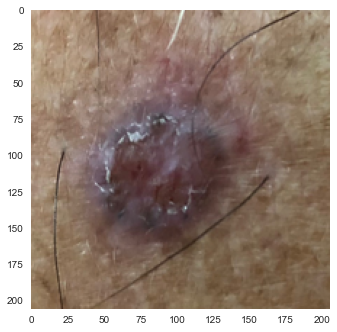

In [5]:
im = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/test.png', cv2.IMREAD_UNCHANGED)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

#file_im = '/Users/theakaroline/Documents/fyp/data_project/images/segmentation/test.png'
#im = plt.imread(file_im)
plt.imshow(im)
plt.grid(None)


uint8


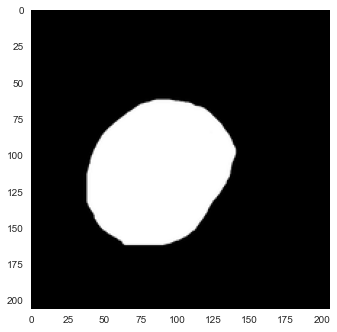

In [7]:
mask1 = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/test-mask.png', cv2.IMREAD_UNCHANGED)
mask1 = cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB) #, cv2.CV_8UC1)

#mask1= cv2.normalize(src=mask1, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

#mask1=plt.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/test-mask.png')
plt.imshow(mask1, cmap="gray")
plt.grid(None)

print(np.result_type(mask1.dtype))

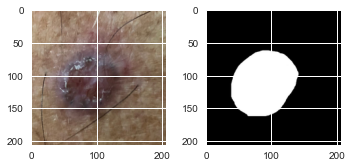

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask1, cmap='gray')
fig.tight_layout()


(206, 206, 3)


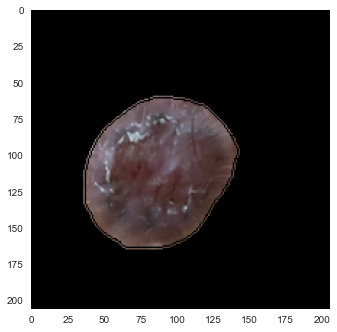

In [9]:
print(mask1.shape)
im2 = im.copy()
im2[mask1== 0] = 0 #[0,0,0,0]
# Display 
plt.imshow(im2)
plt.grid(None)

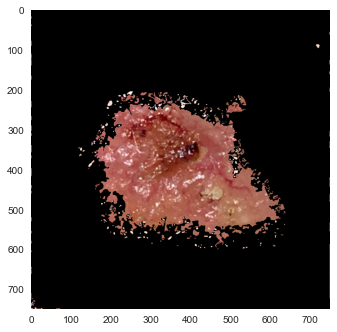

In [24]:

image = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_944_1795_666.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image = cv2.imread('/Users/theakaroline/New.png', cv2.IMREAD_UNCHANGED)


#imga = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#alpha = src[:,:,3] # Channel 3
#image = np.dstack([imga, alpha]) # Add the alpha channel

plt.imshow(image)
plt.grid(None)

In [11]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [12]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1],3)
    return modified_img

In [38]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    
    if '#000000'in hex_colors:
        hex_colors.remove("#000000")
        ordered_colors.pop(0)
        del counts[0]      
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
        
    print(ordered_colors)
    print(hex_colors)
    

[array([111.28561431,  46.36531882,  35.88491446]), array([229.40202656, 182.12693414, 171.60043818]), array([162.05012825,  83.94853463,  71.16143645]), array([181.04599891, 111.67415519,  96.26730455])]
['#b56f60', '#e5b6ab', '#6f2e23', '#a25347']


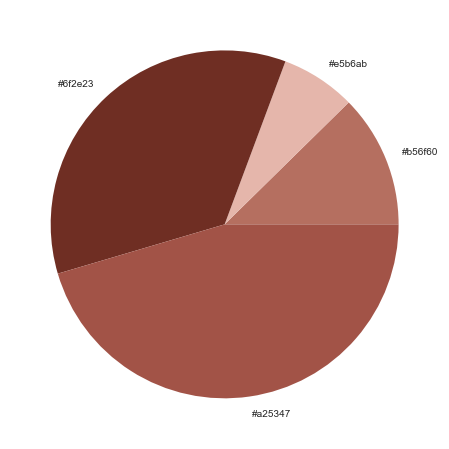

In [39]:
modified_image = prep_image(image)
color_analysis(modified_image)


In [54]:
list_color = [[111.28561431,  46.36531882,  35.88491446], [229.40202656, 182.12693414, 171.60043818], [162.05012825,  83.94853463,  71.16143645]]

print(type(list_color))

<class 'list'>


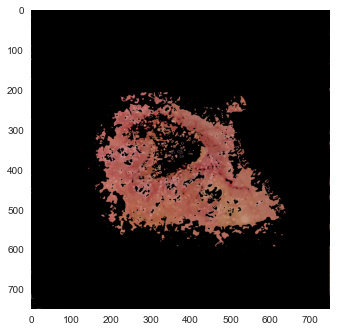

In [201]:
image_hsv=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower mask (0-10)
lower_red = np.array([100,150,150])
upper_red = np.array([255,0,0])
mask0 = cv2.inRange(image, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([150,0,0])
upper_red = np.array([255,150,150])
mask1 = cv2.inRange(image, lower_red, upper_red)

# join my masks
mask = mask0+mask1

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask==0)] = 0

# or your HSV image, which I *believe* is what you want
output_hsv = image.copy()
output_hsv[np.where(mask==0)] = 0

plt.imshow(output_hsv)
plt.grid(None)

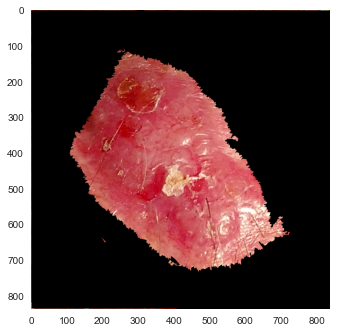

In [150]:
img = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_97_151_503.png', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.grid(None)
#img = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_97_151_503.png')
#plt.axis("off")
#plt.title("Original Image")
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


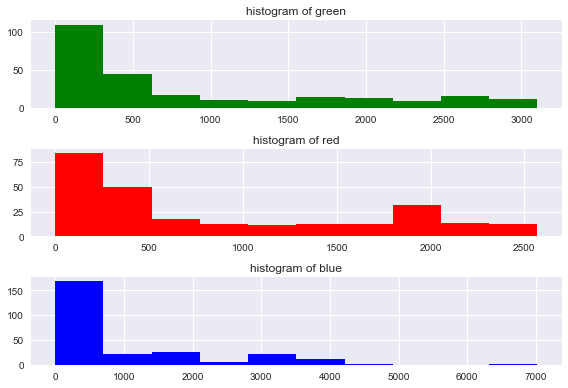

In [17]:


red_histogram = cv2.calcHist([img], [0], None, [256], [1, 256])
green_histogram = cv2.calcHist([img], [1], None, [256], [1, 256])
blue_histogram = cv2.calcHist([img], [2], None, [256], [1, 256]) 
 
plt.subplot(3,1,1)
plt.title("histogram of green")
plt.hist(blue_histogram,color="green")
 
plt.subplot(3,1,2)
plt.title("histogram of red")
plt.hist(green_histogram,color="red")
 
plt.subplot(3,1,3)
plt.title("histogram of blue")
plt.hist(red_histogram,color="blue")
 
plt.tight_layout()
plt.show()

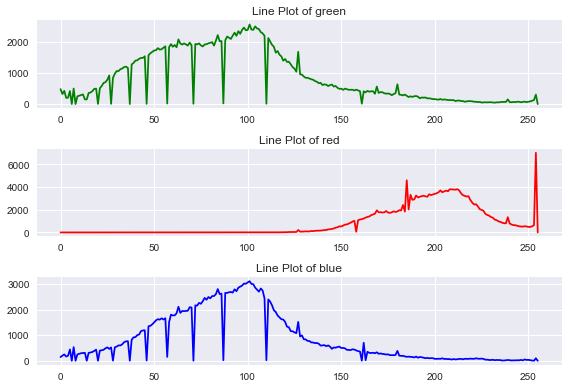

In [18]:
red_histogram = cv2.calcHist([img], [0], None, [256], [1, 256])
green_histogram = cv2.calcHist([img], [1], None, [256], [1, 256])
blue_histogram = cv2.calcHist([img], [2], None, [256], [1, 256]) 
 
plt.subplot(3,1,1)
plt.title("Line Plot of green")
plt.plot(green_histogram,color="green")
 
plt.subplot(3,1,2)
plt.title("Line Plot of red")
plt.plot(red_histogram,color="red")
 
plt.subplot(3,1,3)
plt.title("Line Plot of blue")
plt.plot(blue_histogram,color="blue")
 
plt.tight_layout()
plt.show()

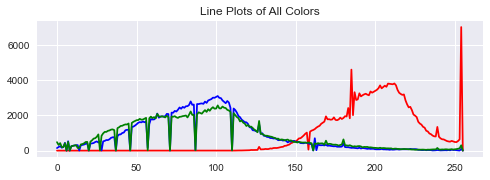

In [19]:
plt.subplot(2,1,2)
plt.title("Line Plots of All Colors")
plt.plot(red_histogram,color="red")
plt.plot(blue_histogram,color="blue")
plt.plot(green_histogram,color="green")

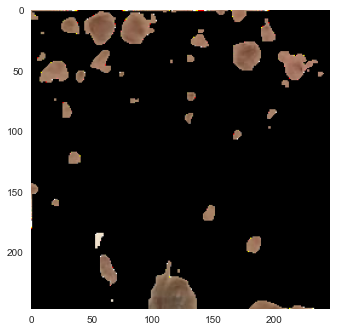

In [151]:
img2 = cv2.imread('/Users/theakaroline/Documents/fyp/data_project/images/segmentation/PAT_87_133_159.png', cv2.IMREAD_UNCHANGED)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.grid(None)

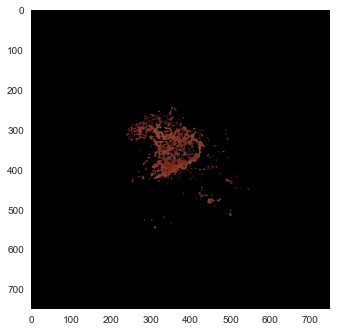

In [229]:
#lower_red = np.array([100,100,150])
#upper_red = np.array([0,0,255])
#mask0 = cv2.inRange(img, lower_red, upper_red)




lower_brown = np.array([40,30,0])
upper_brown = np.array([150,100,100])
mask_brown = cv2.inRange(image, lower_brown, upper_brown)


output_brown = image.copy()
output_brown[np.where(mask_brown==0)] = 0


plt.imshow(output_brown)
plt.grid(None)


'\nnumber between [1,0,0] and [255,80,80] should range 4 on red\n\nnumber between [1,80,80] and [255,110,110] should range 3 on red\n\nnumber between [1,110,110] and [255,130,130] should range 2 on red\n\nnumber between [1,130,130] and [255,160,160] should range 1 on red\n'

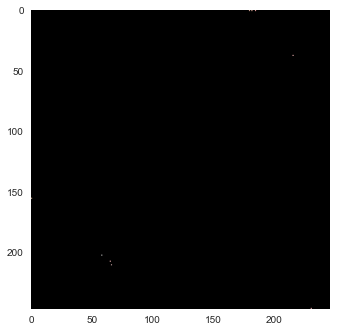

In [263]:

lower_red = np.array([1,130,130])
upper_red = np.array([255,160,160])
mask_red = cv2.inRange(img2, lower_red, upper_red)

output_red = img2.copy()
output_red[np.where(mask_red==0)] = 0
                         
plt.imshow(output_red)
plt.grid(None)

"""
number between [1,0,0] and [255,80,80] should range 4 on red

number between [1,80,80] and [255,110,110] should range 3 on red

number between [1,110,110] and [255,130,130] should range 2 on red

number between [1,130,130] and [255,160,160] should range 1 on red
"""